### 분석 데이터 설명
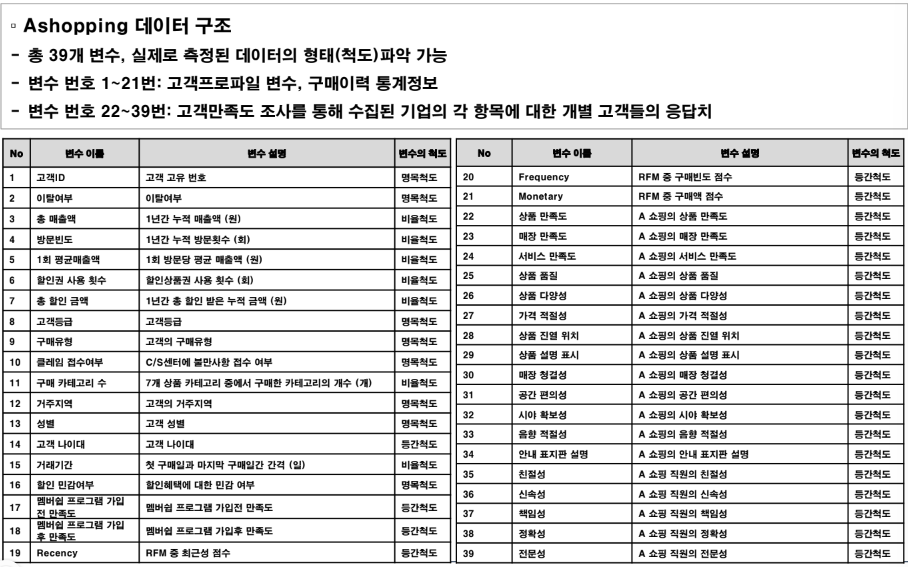
* 1~21: 이 기업의 고객 데이터베이스에 포함되어 있는 고객 프로파일 변수와 고객들의 구매 이력을 바탕으로 요약된 통계정보
* 22~39: 고객 만족도 조사를 통해 수집된 기업의 각 항목에 대한 개별 고객들의 응답치

### 데이터 불러오기

In [11]:
#1. 모듈 불러오기
import pandas as pd

#2. 실습 데이터 불러오기
df=pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

#3. 불러온 데이터 확인하기
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


## 4.2. 데이터 전처리 및 파생변수 생성
### 1. 데이터 전처리
* 통계분석에 적합한 형태와 구조로 데이터를 추출하고 결합 및 전환하는 일련의 작업
#### 1. 표본 추출하기
* 모집단의 특성을 파악하기 위해 모집단 전체가 아니라 그 중 일부를 선택
* 모집단 전체를 분석하지 않아도 모집단에 대한 특성을 가설검증 과정을 통해 파악 가능
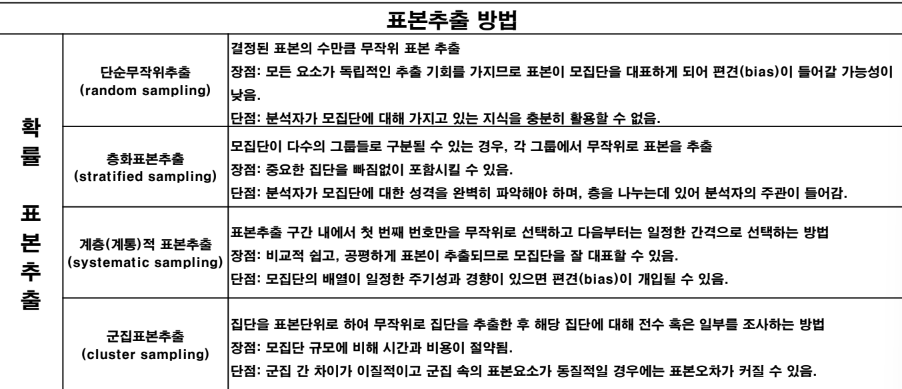
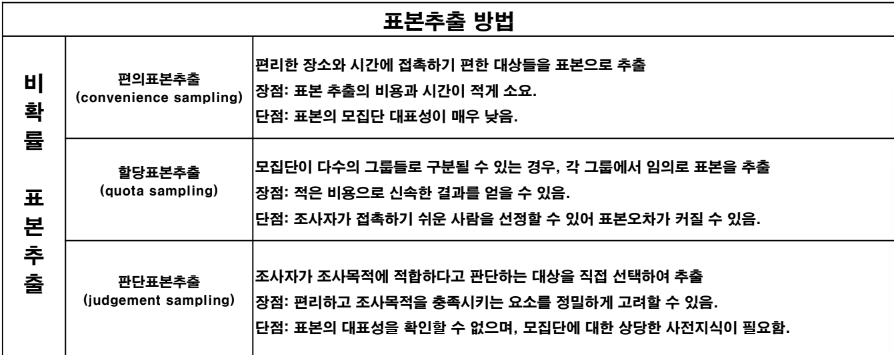

* 총 1000개의 행을 가진 전체 실습 데이터에서 10개의 행만 무작위 표본추출

In [12]:
#무작위 표본추출하기
data_temp=df.sample(n=10, replace=False, random_state=123)

#불러온 데이터 확인
data_temp

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
131,132,0,5501240,27,203750,22,350050,1,4,1,...,6,7,6,7,6,5,6,6,6,5
203,204,0,24832930,78,318371,6,186545,1,2,0,...,5,6,5,5,5,5,5,5,5,5
50,51,0,3225460,8,403183,19,365795,1,1,0,...,5,6,5,5,5,5,5,5,5,5
585,586,0,14802080,30,493403,13,324795,1,2,1,...,7,7,6,6,6,5,3,6,6,6
138,139,0,8546080,45,189913,12,302750,1,2,1,...,5,7,6,7,6,5,5,6,6,6
632,633,0,21913110,18,1217395,12,303695,1,3,1,...,6,5,6,6,7,5,6,6,5,5
328,329,0,4990750,19,262671,13,322850,1,4,1,...,6,6,5,5,5,7,6,5,5,6
461,462,0,6831040,34,200913,21,19300,1,2,0,...,5,6,5,5,5,4,6,6,5,5
924,925,0,4224300,10,422430,20,347200,2,4,1,...,7,6,5,6,7,6,7,6,5,6
479,480,0,2812370,18,156243,11,296895,1,4,0,...,7,7,6,7,6,5,4,5,5,5


#### 2. 조건을 만족하는 레코드 추출하기
* 특정한 분석목적에 적합한 데이터셋을 구성하기 위해 별도의 추출조건을 부여해 표본추출
* 고객의 이탈여부가 '1' 즉, 이탈로 판단된 고객만을 추출하는 작업을 진행해보자

In [13]:
# 레코드 추출하기
churn_customer=df[df.이탈여부==1]

# 불러온 데이터 확인하기
churn_customer.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
18,19,1,8421390,9,935710,16,365845,1,3,1,...,6,5,5,6,7,6,6,5,6,6
63,64,1,2301730,10,230173,17,365395,1,4,0,...,6,7,6,7,6,6,6,6,7,6
71,72,1,6636750,7,948107,28,377345,2,3,1,...,5,4,4,4,4,4,5,5,4,4
72,73,1,9773200,7,1396171,23,379595,2,3,0,...,6,7,6,6,7,5,7,6,6,6


#### 3. 특정 필드 추출하기
* 분석 시 분석자가 필요로 하는 정보 항목들만 추출하여 사용하는 경우가 흔함
* 고객 id, 방문빈도 컬럼만 추출하는 필드 추출 작업을 진행한다


In [14]:
#필드 추출
df_1=df[['고객ID', '방문빈도']]

#불러온 데이터 확인
df_1

,고객ID,방문빈도
0,1,17
1,2,14
2,3,18
3,4,17
4,5,73
...,...,...
995,996,8
996,997,49
997,998,10
998,999,15


### 4. 데이터 분할하기
* 데이터가 많아 특정 조건을 만족하는 사례(표본)만 추출하여 분석에 활용할 수 있음
* 고객 ID를 기준으로 ID가 500이하와 500초과인 두 고객군으로 분할

In [15]:
#데이터 분할
Under_500=df[df.고객ID<=500]
Upper_500=df[df.고객ID>500]

#불러온 데이터 확인하기
Under_500.tail()
Upper_500.tail()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4
999,1000,0,3182880,23,138386,19,367045,1,4,0,...,7,7,6,7,6,5,6,7,6,6


In [16]:
Under_500.tail()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
495,496,0,3950410,18,219467,5,132345,2,2,0,...,6,6,6,6,5,5,6,5,6,5
496,497,0,11398490,24,474937,22,350550,1,4,0,...,6,7,6,5,6,6,5,5,6,6
497,498,0,5027350,28,179548,12,303250,1,4,0,...,6,6,6,6,5,5,6,5,6,5
498,499,0,8624590,15,574973,17,365145,1,3,0,...,4,6,5,5,6,5,4,5,5,5
499,500,0,10916910,29,376445,8,260450,2,2,0,...,4,6,4,7,7,5,6,7,5,6


### 데이터 추가하기
* 분할한 데이터를 다시 하나의 데이터셋으로 합칠 수 있음
* 앞서 분할한 고객id 1\~500 데이터셋의 501\~1000데이터셋을 추가한다.

In [17]:
#1. 모듈 및 데이터 탑재
import pandas as pd
df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')

#2. 필드 추출하기
df_1= df[['고객ID', '방문빈도']]
df_2 = df[['고객ID', '총_매출액']]

#3. 데이터 병합하기 
df_merge= df_1.merge(df_2)

#4. 데이터 출력하기
df_merge.head()

,고객ID,방문빈도,총_매출액
0,1,17,4007080
1,2,14,3168400
2,3,18,2680780
3,4,17,5946600
4,5,73,13745950


### 파생변수의 생성
* 특정 변수에 특정 조건이나 특정 함수를 사용하여 새롭게 파생시킨 변수(필드)를 의미
* 전략적 활용도는 높으나 내부적으로 데이터 처리 과정을 통해 후속적으로 생성됨.
* 파생변수 생성 방법은 아래 표와 같음

파생변수 생성방법|의미|예시
---|---|---
표현형태 변환|기존 변수의 표현 방식을 단순히 다른 형태로 전환하여 표시|날짜로부터 요일 계산, 상품번호를 상품 이름으로 변환
척도변환|특정 변수의 척도를 변환하여 새로운 척도로 나타내는 방식|나이로부터 나이대 계산, 구매액으로부터 고객등급 산출
여러 변수를 활용한 모델링|각종 함수나 기존 변수들의 수학적 결합을 통한 새로운 변수를 모델링하여 새로운 변수를 생성|매출액과 방문횟수를 활용하여 1회 평균 매출액 변수 생성,  R, F, M 변수를 활용하여 RFM점수 계산
거래이력 요약|특정 레코드의 누적 거래이력을 요약하여 요약 통계량 등을 제공하는 방식|고객별 누적 구매액 계산, 고객별 총 방문횟수 계산

### 표현형태 변환하기
* 단순히 기존 변수의 표현방식을 다른 형태로 전환하여 보여주는 것
* 성별 데이터에 대한 표현형태 반환

In [19]:
import numpy as np

# 표현형태 변환하기
df['남녀']=np.where(df.성별==0, '남자', '여자')

# 데이터 확인하기
df[['고객ID', '성별', '남녀']]

,고객ID,성별,남녀
0,1,1,여자
1,2,1,여자
2,3,1,여자
3,4,1,여자
4,5,0,남자
...,...,...,...
995,996,1,여자
996,997,0,남자
997,998,0,남자
998,999,1,여자


### 척도 변환하기
* 특정 변수의 척도를 변환하여 새로운 척도를 나타내는 방식
* 고객들의 총 매출액을 기준을 5,000,000원 이상일 경우 상, 5,000,000원 미만 3,000,000이상일 경우 중, 그리고 3,000,000원 미만일 경우 하로 표현하는 고객등급 변수를 만들어 본다

In [20]:
# 척도 변환 파생변수 생성
df['New고객등급']=np.where(df.총_매출액>=5000000, '상', np.where(df.총_매출액>=3000000,'중', '하'))

#  데이터 확인하기
df[['고객ID', '총_매출액', 'New고객등급']]

,고객ID,총_매출액,New고객등급
0,1,4007080,중
1,2,3168400,중
2,3,2680780,하
3,4,5946600,상
4,5,13745950,상
...,...,...,...
995,996,5135090,상
996,997,10315690,상
997,998,2741290,하
998,999,11268990,상


### 모델링을 활용해 파생변수 생성하기
* 각종 함수나 기존 변수들의 수학적 결합을 통해 새로운 변수를 모델링함으로써 파생변수를 만드는 방법
* 고객들의 1회 평균매출액 파생변수를 생성해본다.

In [21]:
# 척도 변환 파생변수 생성
df["New_1회_평균매출액"]=df['총_매출액']/df['방문빈도']

# 데이터 확인
df[['고객ID', '총_매출액', '방문빈도', 'New_1회_평균매출액']]

,고객ID,총_매출액,방문빈도,New_1회_평균매출액
0,1,4007080,17,235710.588235
1,2,3168400,14,226314.285714
2,3,2680780,18,148932.222222
3,4,5946600,17,349800.000000
4,5,13745950,73,188300.684932
...,...,...,...,...
995,996,5135090,8,641886.250000
996,997,10315690,49,210524.285714
997,998,2741290,10,274129.000000
998,999,11268990,15,751266.000000


### 거래이력 요약을 통한 파생변수 생성하기
* 특정 레코드 혹은 사례의 누적 거래이력을 요약하여 요약통계량과 같이 특정 레코드의 특성을 나타내는 새로운 변수를 생성하는 방법
* 고객의 이탈여부에 따라 이탈여부 그룹 별 매출액 합계를 생성해본다.

In [22]:
#비이탈고객 레코드 추출
churn_customer=df[df.이탈여부==1]
Non_churn_customer=df[df.이탈여부==0]

# 매출합계 출력
print(sum(churn_customer.총_매출액))
print(sum(Non_churn_customer.총_매출액))

373918850
6694770910


## 유용한 통계 그래프

### 히스토그램
1. 개념 및 주요 이론
* 히스토그램이란 계량치 데이터의 분포를 파악, 정보(분포, 중심, 산포, 규격치 등)을 얻기 위한 도구
*표본 데이터로부터 모집단 분포의 특성을 추측하기 위하여 가장 보편적으로 많이 사용됨
* 모집단 분포의 형태, 중심위치, 산포와 같은 분포 특성을 육안으로 살펴 볼 수 있음.
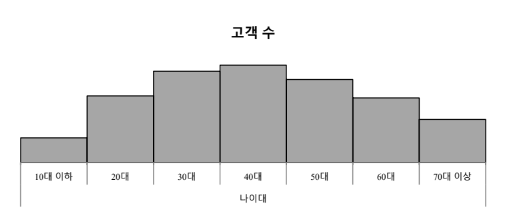

#### 안정된 형태의 분포를 보이는 히스토그램의 조건
* 기둥 사이의 간격이 없도록 해야 한다.
* 계급의 구간과 일치하도록 해야 한다.
* 히스토그램의 면적은 1이 되게 하는것이 보통이며, $도수밀도=\frac{계급의 도수}{계급간격}$이다.

2. 분석 및 해석
* 고객 서비스 만족도의 현황을 히스토그램으로 파악해보자

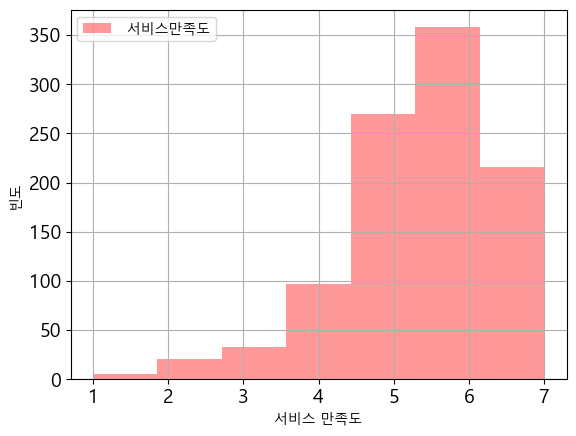

In [24]:
import matplotlib
import matplotlib.pyplot as plt 

# 한글깨짐현상 방지
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

# 히스토그램 작성
%matplotlib inline
plt.hist(df['서비스_만족도'], alpha=0.4, bins=7, rwidth=1, color='red', label=' 서비스만족도')

# 각종 옵션설정
plt.legend()
plt.grid()
plt.xlabel('서비스 만족도')
plt.ylabel('빈도')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 산점도
1. 개념 및 주요 이론
    * 두 개의 데이터를 직교 좌표계를 이용하여 두 변수들 간의 관계를 좌표평면 상의 점으로 나타내는 방법
    * 변수간의 대략적인 관계를 파악할 수 있으며 통계분석 전 산점도를 통해 변수간 관계를 살펴볼 수 있음
    * 변수간 관계를 대략적으로 파악 가능하나 통계적인 검증은 할 수 없음

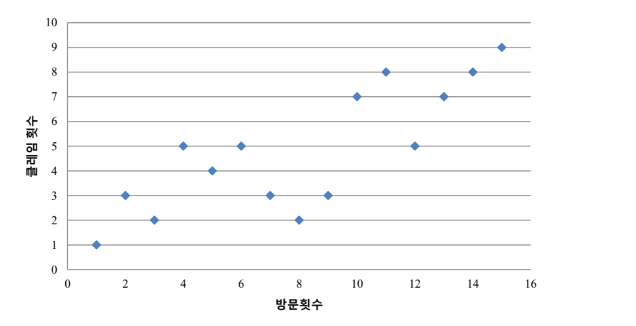

2. 분석 및 해석
* 산점도를 활용해 방문빈도와 총 매출액의 관계를 파악해보자

<Axes: title={'center': '방문 빈도와 총 매출액간 관계'}, xlabel='방문빈도', ylabel='총_매출액'>

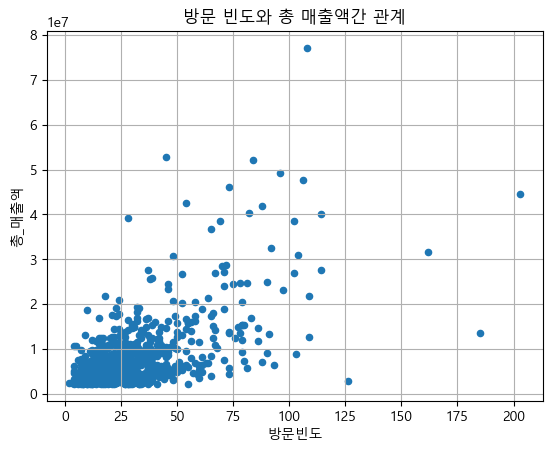

In [27]:
%matplotlib inline
df.plot.scatter(x='방문빈도',y='총_매출액', grid=True, title='방문 빈도와 총 매출액간 관계')